In [5]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os

In [16]:
year = "2003"

directory = '/n/home12/hongwei/HONGWEI/lagranto_era5_0.2um/Simulation_0.2um/'+year
filename = '/traj_'+year+'0104.1'

In [17]:
file1 = open(directory+filename, 'r')
Lines = file1.readlines()

N_head = 5 # first 5 lines are head lines, not include data
N_column = 4

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')

Nt = int( (len(Lines)-4)/N_parcel - 1 ) # 2928
print(Nt)

data = np.zeros((N_parcel, Nt, N_column))

3654


In [18]:
count = 0

# Strips the newline character
for line in tqdm(Lines):
    count += 1
#     print("Line{}: {}".format(count, line.strip()))
    
    if count>=5:
        i = count-5
        i_parcel = math.floor( i / (Nt+1) ) # Nt time lines plue 1 empty line
        i_t = i%(Nt+1)
        
        if i_t!=0:
            a = line.split()

            if i_t==1:
                if float(a[0])!=0.0: print('ERROR: first time is not 0 !!!')
#             data[i_parcel,i_t-1,0] = float(a[0]) # time
            data[i_parcel,i_t-1,1] = float(a[1]) # lon
            data[i_parcel,i_t-1,2] = float(a[2]) # lat
            data[i_parcel,i_t-1,3] = float(a[3]) # lev
#             print(i_parcel, i_t-1, data[i_parcel,i_t-1,:])

100%|██████████| 11052724/11052724 [00:27<00:00, 404085.03it/s]


In [19]:
data2 = np.zeros((Nz,Ny,Nx,Nt,N_column))

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            i_parcel = ix*(Ny*Nz) + iy*Nz + iz
            data2[iz,iy,ix,:,:] = data[i_parcel,:,:]

In [20]:
data2.shape

(6, 21, 24, 3654, 4)

1: [ 60.  75.  90. 105.] [-6. -3.  0.  3.  6.]
2: [240. 255. 270. 285.] [-6. -3.  0.  3.  6.]


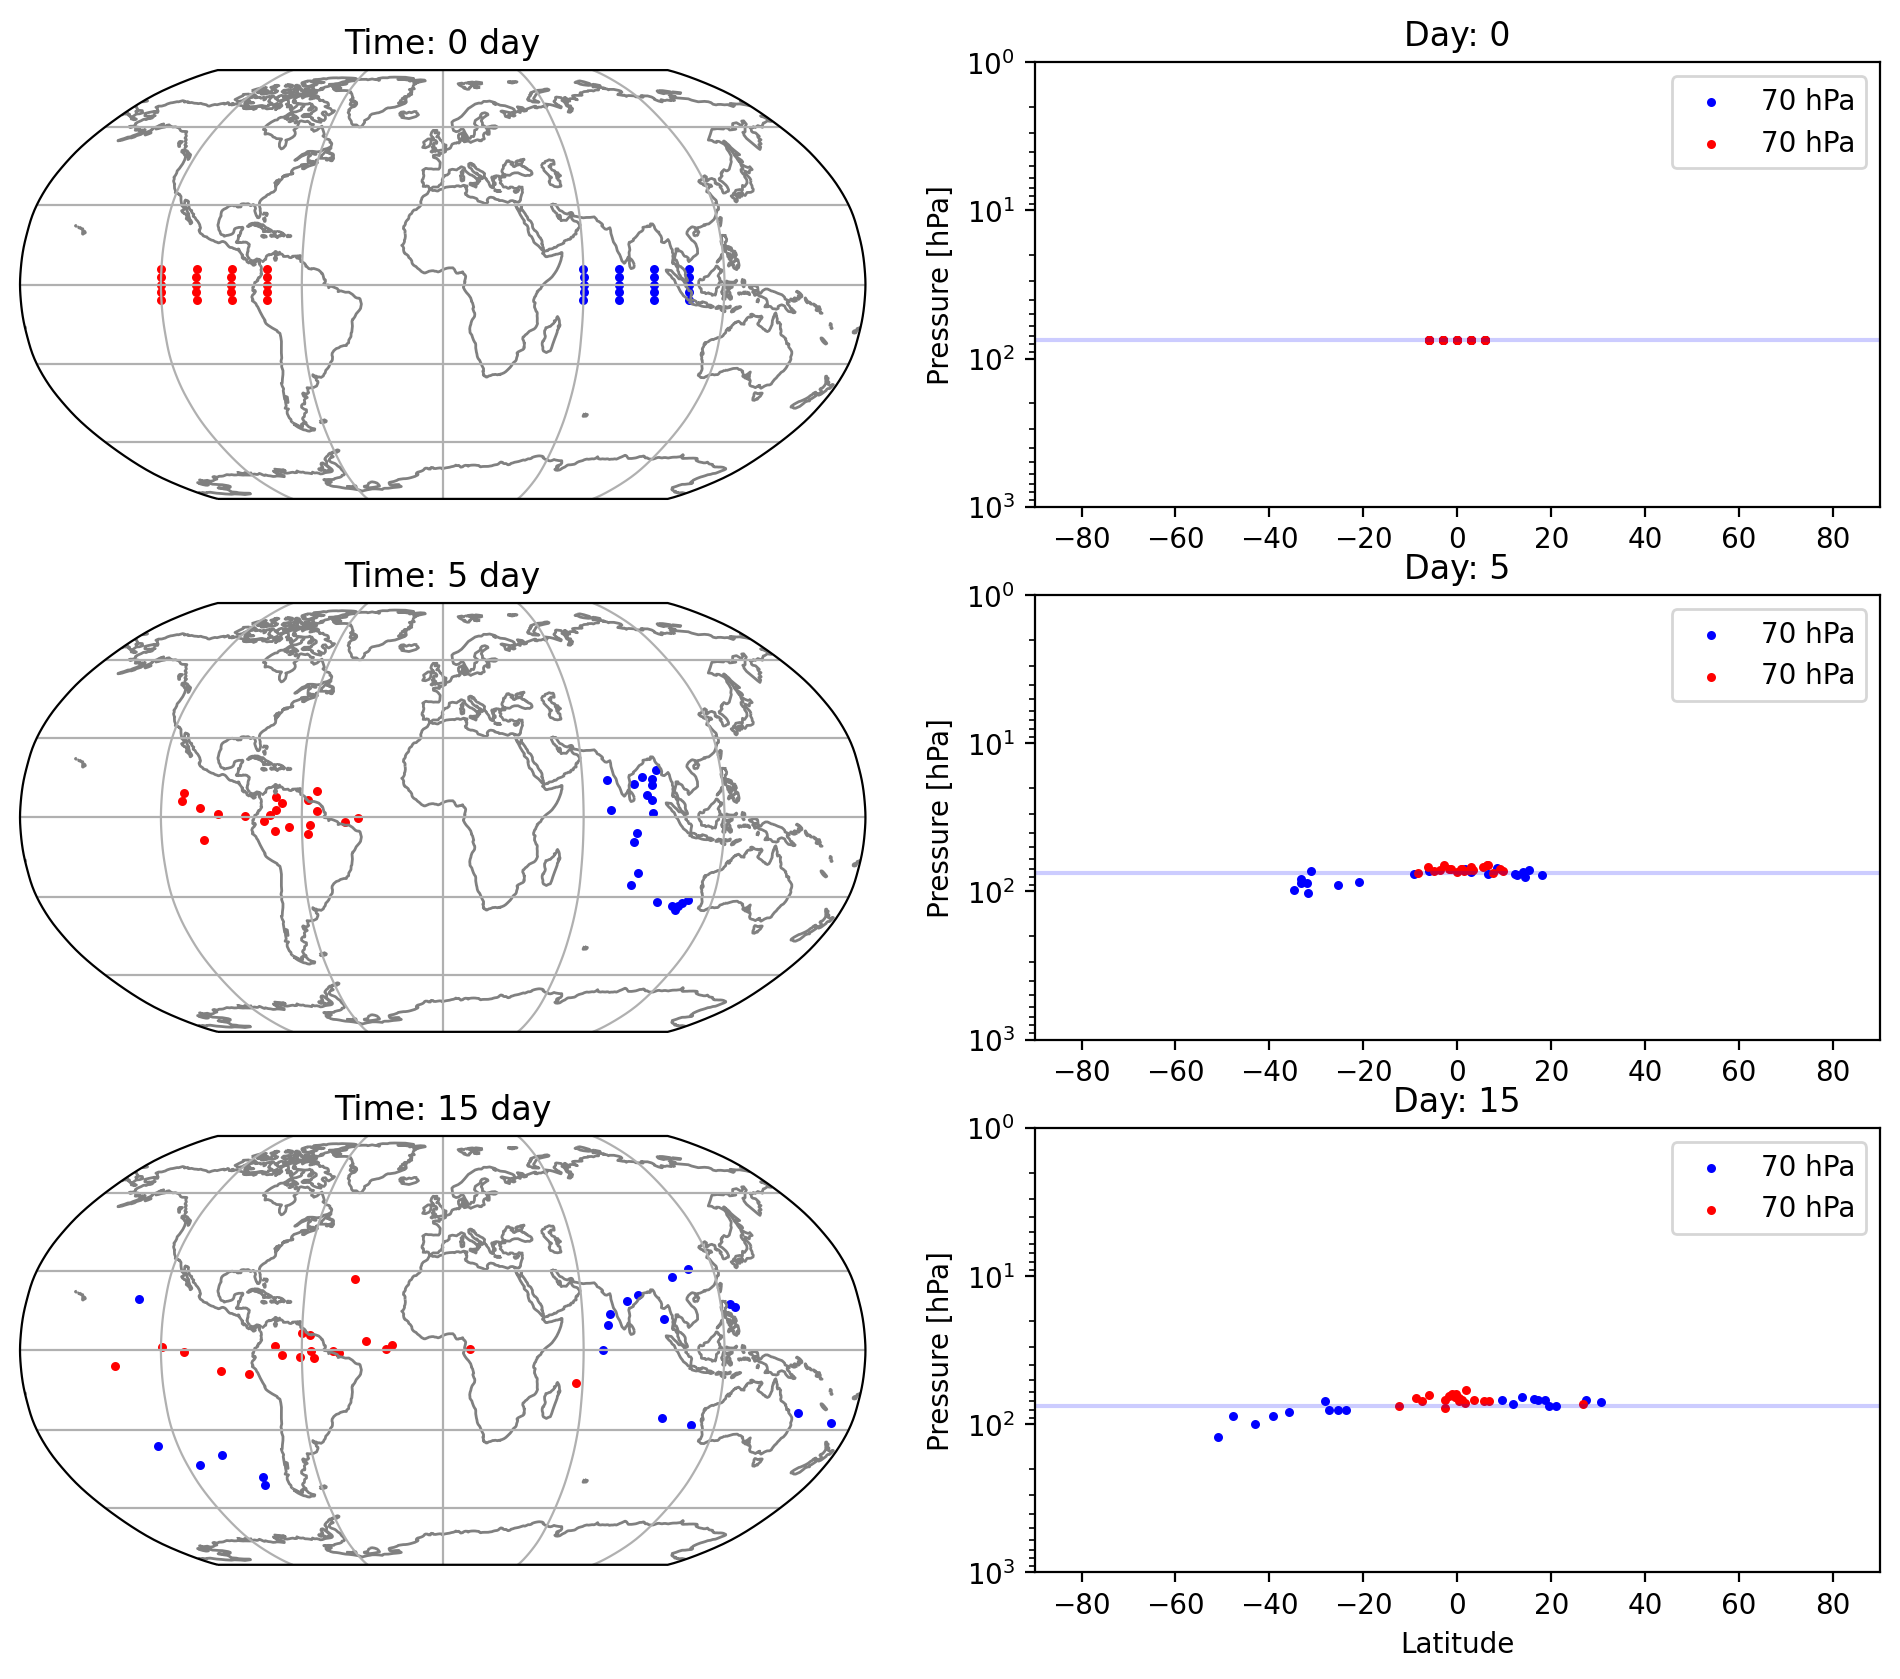

In [28]:
fig = plt.figure(figsize=(12,10), dpi=200)
projection=crs.Robinson(central_longitude=0)

iy1 = 8
iy2 = 13

ix11 = 4
ix12 = 8

ix21 = 16
ix22 = 20

###

i=0
xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 

# print(xx1.shape, xx2.shape)

ax1 = fig.add_subplot(3,2,1, projection=projection)
ax1.set_global()
ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
ax1.gridlines()
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax1.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax1.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax1.set_title(f'Time: {i} day');

#

ax11 = fig.add_subplot(3,2,2)
    
ax11.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax11.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax11.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax11.set_xlim([-90,90])
ax11.set_ylim([1, 1000])
    
ax11.set_yscale('log')
plt.gca().invert_yaxis()
    
# ax11.set_xlabel('Latitude')
ax11.set_ylabel('Pressure [hPa]')
ax11.set_title('Day: ' + str(i))

ax11.legend()
    
    
###
i=5

xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 


ax2 = fig.add_subplot(3,2,3, projection=projection)
ax2.set_global()
ax2.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax2.add_feature(cfeature.BORDERS, edgecolor="grey")
ax2.gridlines() 
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax2.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax2.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax2.set_title(f'Time: {i} day');

#
ax22 = fig.add_subplot(3,2,4)
    
ax22.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax22.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax22.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax22.set_xlim([-90,90])
ax22.set_ylim([1, 1000])
    
ax22.set_yscale('log')
plt.gca().invert_yaxis()
    
# ax22.set_xlabel('Latitude')
ax22.set_ylabel('Pressure [hPa]')
ax22.set_title('Day: ' + str(i))

ax22.legend()


###
i=15
xx1=data2[1,iy1:iy2,ix11:ix12,i,1] # data[::36,i*8,1]
yy1=data2[1,iy1:iy2,ix11:ix12,i,2]
zz1=data2[1,iy1:iy2,ix11:ix12,i,3]


xx2=data2[1,iy1:iy2,ix21:ix22,i,1] # data[::36,i*8,1]
yy2=data2[1,iy1:iy2,ix21:ix22,i,2] 
zz2=data2[1,iy1:iy2,ix21:ix22,i,3] 




ax3 = fig.add_subplot(3,2,5, projection=projection)
ax3.set_global()
ax3.add_feature(cfeature.COASTLINE, edgecolor="grey")
# ax3.add_feature(cfeature.BORDERS, edgecolor="grey")
ax3.gridlines()
    
if i==0: 
    print('1:', xx1[0,:], yy1[:,0])
    print('2:', xx2[0,:], yy2[:,0])
    
ax3.scatter(x=xx1, y=yy1,
            color="blue",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
ax3.scatter(x=xx2, y=yy2,
            color="red",
            s=5,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

ax3.set_title(f'Time: {i} day');

#
ax33 = fig.add_subplot(3,2,6)
    
ax33.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=5) ## Important

ax33.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=5) ## Important
    
ax33.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
ax33.set_xlim([-90,90])
ax33.set_ylim([1, 1000])
    
ax33.set_yscale('log')
plt.gca().invert_yaxis()
    
ax33.set_xlabel('Latitude')
ax33.set_ylabel('Pressure [hPa]')
ax33.set_title('Day: ' + str(i))

ax33.legend();


  0%|          | 0/30 [00:00<?, ?it/s]

1: [ 90. 105. 120. 135. 150.] [-9. -6. -3.  0.  3.  6.  9.]


IndexError: index 0 is out of bounds for axis 1 with size 0

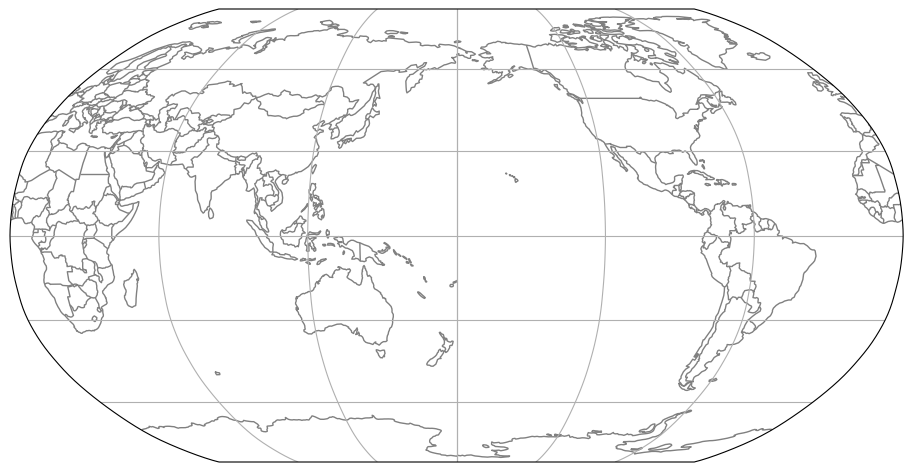

In [22]:
# plot

for i in tqdm(np.arange(0,30,1)):
    fig = plt.figure(figsize=(12,6), dpi=100)

    ax1 = fig.add_subplot(1,1,1, projection=crs.Robinson(central_longitude=180))
    ax1.set_global()
    ax1.add_feature(cfeature.COASTLINE, edgecolor="grey")
    ax1.add_feature(cfeature.BORDERS, edgecolor="grey")
    ax1.gridlines()


    xx1=data2[1,7:14,6:11,i,1] # data[::36,i*8,1]
    yy1=data2[1,7:14,6:11,i,2]
    
    xx2=data2[1,7:14,25:30,i,1] # data[::36,i*8,1]
    yy2=data2[1,7:14,25:30,i,2] 
    
    if i==0: 
        print('1:', xx1[0,:], yy1[:,0])
        print('2:', xx2[0,:], yy2[:,0])
    
    ax1.scatter(x=xx1, y=yy1,
            color="blue",
            s=15,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important
    
    ax1.scatter(x=xx2, y=yy2,
            color="red",
            s=15,
            alpha=1.0,
            transform=crs.PlateCarree()) ## Important

    ax1.set_title(f'Time: {i} day')


    plt.tight_layout()
    plt.savefig(str(i+1)+'_xy.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

In [ ]:
Image(filename=f'10_xy.png')

In [ ]:

for it in tqdm(range(30)):
    
    
    # (1)
    fig = plt.figure(figsize=(12,6), dpi=100)

    ax1 = fig.add_subplot(1,1,1)
    
    
    yy1=data2[1,7:14,6:11,it,2] # data[::36,i*8,1]
    zz1=data2[1,7:14,6:11,it,3]
    
    yy2=data2[1,7:14,25:30,it,2] # data[::36,i*8,1]
    zz2=data2[1,7:14,25:30,it,3] 

    
    # 70 hpa    
#     xx1=data2[1,:,:,i*8*N_days,2].flatten()
#     yy1=data2[1,:,:,i*8*N_days,3].flatten()
    
    ax1.scatter(x=yy1[:], y=zz1[:],
            color="blue", label='70 hPa',
            s=15) ## Important

    ax1.scatter(x=yy2[:], y=zz2[:],
            color="red", label='70 hPa',
            s=15) ## Important
    
    ax1.plot((-90,90),(75,75),'blue',alpha=0.2)
        

    
    ax1.set_xlim([-90,90])
    ax1.set_ylim([1, 1000])
    
    ax1.set_yscale('log')
    plt.gca().invert_yaxis()
    
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Pressure [hPa]')
    ax1.set_title('Day: ' + str(i))

    plt.legend()
    plt.tight_layout()
    plt.savefig(str(i+1)+'_yz.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
    
        
plt.close();

In [ ]:
Image(filename=f'25_yz.png')